In [1]:
#Importing the libraries

import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import random 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
path_dir="C:/python_lessons/January_Project/Brain/Training/"

In [3]:
Categories=["glioma","meningioma","notumor","pituitary"]

In [20]:
test_image = cv.imread(path_dir+'glioma/Tr-gl_0010.jpg')
test_image.shape

(512, 512, 3)

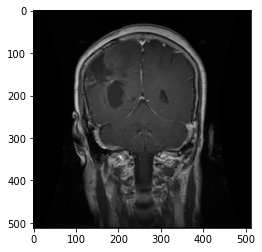

In [21]:
plt.imshow(test_image)

In [6]:
data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_dir , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [7]:
random.shuffle(data)

In [8]:
x_data = []
y_data = []
for features,labels in data:
    x_data.append(features)
    y_data.append(labels)

In [9]:
df = pd.DataFrame(y_data,columns=["labels"])

In [10]:
df.head(10)

,labels
0,pituitary
1,notumor
2,meningioma
3,notumor
4,glioma
5,notumor
6,notumor
7,notumor
8,meningioma
9,meningioma


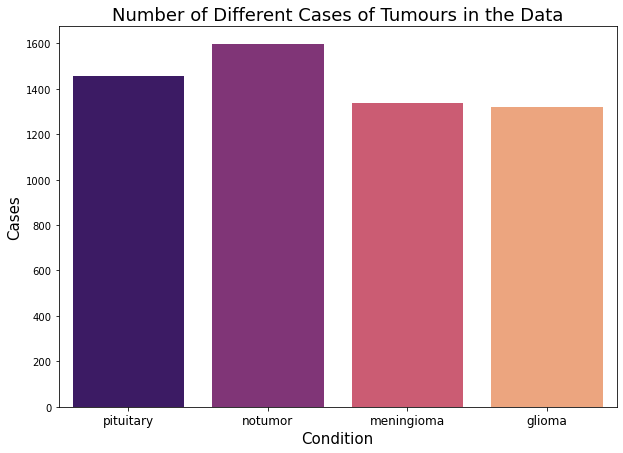

In [31]:
plt.figure(figsize=(10,7)) #Making the graph bigger to see all the years

#new_labels = ['Pituitary','No Tumour', 'Meningioma', 'Glioma']

count_plot = sns.countplot(x='labels' ,data=df, palette='magma') #Making the plot and defining it

count_plot.set_xticklabels(count_plot.get_xticklabels(), fontsize=12) #Changing the x labels to see them better

#Adding labels:
count_plot.set_title('Number of Different Cases of Tumours in the Data', fontsize=18)
count_plot.set_xlabel('Condition', fontsize=15)
count_plot.set_ylabel('Cases', fontsize=15)
#plt.tight_layout() #So that can see the labels. Because of the figure size the titles otherwise go out of view.
plt.show()

In [12]:
#Putting features into an array

x_data = np.array(x_data)

In [13]:
le = LabelEncoder()
y_data = le.fit_transform(y_data)

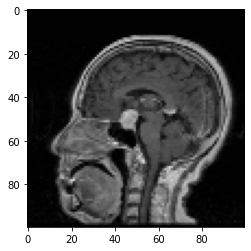

In [14]:
plt.imshow(x_data[301])

In [16]:
im = x_data[301]

im.shape

(100, 100, 3)

In [32]:
test_data = []
def create_data():
    for categories in Categories:
        path = os.path.join("C:/python_lessons/January_Project/Brain/Testing/" , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                test_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [33]:
random.shuffle(test_data)

In [34]:
x_test = []
y_test = []
for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)

In [35]:
x_test = np.array(x_test)

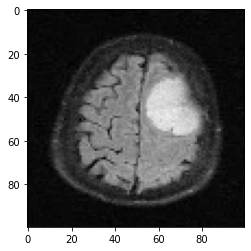

In [36]:
plt.imshow(x_test[3])

In [37]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [38]:
x_data.shape

(5712, 100, 100, 3)

In [20]:
x_test.shape

(1311, 100, 100, 3)

In [40]:
cnn = Sequential()
cnn.add(Conv2D(64,(3,3),activation="relu",input_shape=(100,100,3)))
cnn.add(MaxPool2D(2,2))
cnn.add(Conv2D(128,(5,5),activation="relu"))
cnn.add(MaxPool2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(212,activation="relu"))
cnn.add(Dense(4,activation="softmax"))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 45, 45, 128)       204928    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_2 (Dense)             (None, 212)              

In [41]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [23]:
len(cnn.layers) #There are 7 layers in the cnn

7

In [43]:
history_cnn = cnn.fit(x_data,y_data,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
179/179 [==============================] - 180s 1s/step - loss: 0.0648 - accuracy: 0.9799 - val_loss: 0.3070 - val_accuracy: 0.9252
Epoch 2/20
179/179 [==============================] - 153s 856ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.2535 - val_accuracy: 0.9314
Epoch 3/20
179/179 [==============================] - 151s 843ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.3547 - val_accuracy: 0.9275
Epoch 4/20
179/179 [==============================] - 151s 846ms/step - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.3508 - val_accuracy: 0.9214
Epoch 5/20
179/179 [==============================] - 150s 838ms/step - loss: 0.0270 - accuracy: 0.9928 - val_loss: 0.2942 - val_accuracy: 0.9306
Epoch 6/20
179/179 [==============================] - 169s 944ms/step - loss: 0.0382 - accuracy: 0.9912 - val_loss: 0.4433 - val_accuracy: 0.9222
Epoch 7/20
179/179 [==============================] - 161s 899ms/step - loss: 0.0886 - accuracy: 0.9767 - val_loss: 0.3305 - va

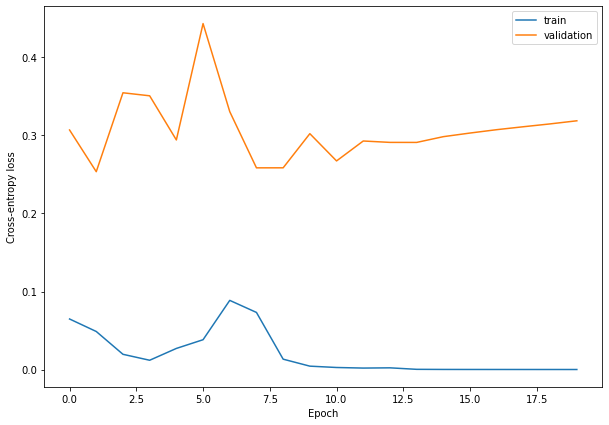

In [45]:
plt.figure(figsize=(10,7))
plt.plot(history_cnn.history["loss"])
plt.plot(history_cnn.history["val_loss"])
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy loss')
plt.legend(["train","validation"]);

In [46]:
y_pred = cnn.predict(x_test)

41/41 [==============================] - 9s 204ms/step


<AxesSubplot:>

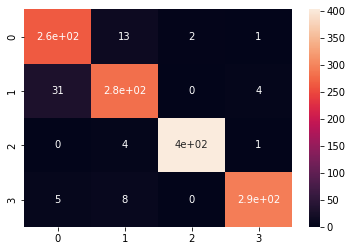

In [47]:
sns.heatmap(confusion_matrix(y_pred.argmax(axis=1),y_test),annot=True)

In [48]:
confusion_matrix(y_pred.argmax(axis=1),y_test)

array([[264,  13,   2,   1],
       [ 31, 281,   0,   4],
       [  0,   4, 403,   1],
       [  5,   8,   0, 294]], dtype=int64)

In [49]:
accuracy_score(y_pred.argmax(axis=1),y_test)

0.9473684210526315